[View in Colaboratory](https://colab.research.google.com/github/constantinembufung/multiclass-classification-with-tensorflow/blob/master/Classifying_newswires_with_Deep_Learning.ipynb)

# Loading the Reuters dataset

In [4]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 
#the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

2113536/2110848 [==============================] - 2s 1us/step


You have 8,982 training examples and 2,246 test examples

In [6]:
print(len(train_data))
print(len(test_data))

8982
2246


Our data is a list of integers, so we will use one-hot encoding to encode the data 

In [8]:
print(train_data[0])
print(train_labels[10])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


# Preparing the data
we have to vectorize the data before feeding it into our neural network

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) #vectorize training data
x_test  = vectorize_sequences(test_data) #vectorise test data 

In [0]:
#vectorize the labels
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels) #vectorize training label
one_hot_test_labels  = to_one_hot(test_labels) #vectorise test labels 

We wil have done the same thing using Keras,


In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

#  Building your network
we are going to use a 64 dimensional layers

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # each input sample, the network will output 46-dimensional vector



1.   We are going to use a softmax activation -  the network will output a probability distribution over the 46 different output  and the 46 scores will sum to 1
2.   we use categorical_crossentropy - which means the distance btw 2 probability distribution



# Compiling the model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Validating your approach

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 139us/step - loss: 2.6127 - acc: 0.4647 - val_loss: 1.7269 - val_acc: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.4069 - acc: 0.7083 - val_loss: 1.2753 - val_acc: 0.7310
Epoch 3/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.0428 - acc: 0.7785 - val_loss: 1.1036 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8173 - acc: 0.8316 - val_loss: 1.0284 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.6502 - acc: 0.8634 - val_loss: 0.9528 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5289 - acc: 0.8903 - val_loss: 0.9202 - val_acc: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.4205 - acc: 0.9112 - val_loss: 0.9018 - val_acc: 0.8140


7982/7982 [==============================] - 1s 149us/step - loss: 0.2858 - acc: 0.9355 - val_loss: 0.8840 - val_acc: 0.8210
Epoch 10/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.2434 - acc: 0.9435 - val_loss: 0.8833 - val_acc: 0.8150
Epoch 11/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.2086 - acc: 0.9496 - val_loss: 0.9078 - val_acc: 0.8140
Epoch 12/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.1822 - acc: 0.9525 - val_loss: 0.9347 - val_acc: 0.8060
Epoch 13/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.1702 - acc: 0.9524 - val_loss: 0.9431 - val_acc: 0.8150
Epoch 14/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.1550 - acc: 0.9548 - val_loss: 0.9840 - val_acc: 0.8080
Epoch 15/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.1410 - acc: 0.9578 - val_loss: 0.9664 - val_acc: 0.8070
Epoch 16/20
7982/7982 [==============================

7982/7982 [==============================] - 1s 146us/step - loss: 0.1198 - acc: 0.9579 - val_loss: 1.1015 - val_acc: 0.7900
Epoch 19/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.1172 - acc: 0.9570 - val_loss: 1.0295 - val_acc: 0.8100
Epoch 20/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.1152 - acc: 0.9570 - val_loss: 1.0610 - val_acc: 0.8040


#  Plotting the training and validation loss

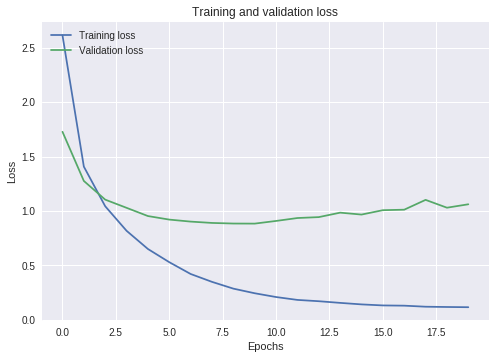

In [32]:

import  matplotlib.pyplot  as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

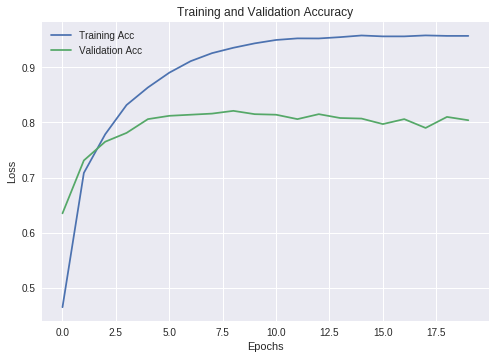

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Acc', 'Validation Acc'], loc='upper left')
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

# Retraining a model from scratch

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 135us/step - loss: 2.6853 - acc: 0.5233 - val_loss: 1.8243 - val_acc: 0.6470
Epoch 2/9
7982/7982 [==============================] - 1s 132us/step - loss: 1.4856 - acc: 0.6947 - val_loss: 1.3547 - val_acc: 0.7030
Epoch 3/9
7982/7982 [==============================] - 1s 149us/step - loss: 1.0869 - acc: 0.7681 - val_loss: 1.1717 - val_acc: 0.7410
Epoch 4/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.8566 - acc: 0.8205 - val_loss: 1.0692 - val_acc: 0.7680
Epoch 5/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.6850 - acc: 0.8597 - val_loss: 0.9760 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.5440 - acc: 0.8901 - val_loss: 0.9223 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.4353 - acc: 0.9118 - val_loss: 0.8964 - val_acc: 0.8130
Epoch 8

2246/2246 [==============================] - 0s 105us/step


In [35]:
print(results)

[0.9920435508021476, 0.7836153161706185]


This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1892252894033838

# Generating predictions on new data

In [0]:
predictions = model.predict(x_test)

In [39]:
#each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

The coefficients in this vector sum to 1

In [40]:
np.sum(predictions[0])

0.99999976

In [42]:
#The largest entry is the predicted class
np.argmax(predictions[0])

3